In [24]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('data/data.csv')

In [26]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
data.shape

(1000, 8)

In [28]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
data.duplicated().sum()

np.int64(0)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [32]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [33]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [34]:
numeric_features = [ feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [ feature for feature in data.columns if data[feature].dtype == 'O']

print ('weWe have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


weWe have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [35]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average score'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
reading_full = data[data['reading score'] == 100]['average score'].count()
writing_full = data[data['writing score'] == 100]['average score'].count()
math_full = data[data['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [40]:
reading_less_20 = data[data['reading score'] <= 20]['average score'].count()
writing_less_20 = data[data['writing score'] <= 20]['average score'].count()
math_less_20 = data[data['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


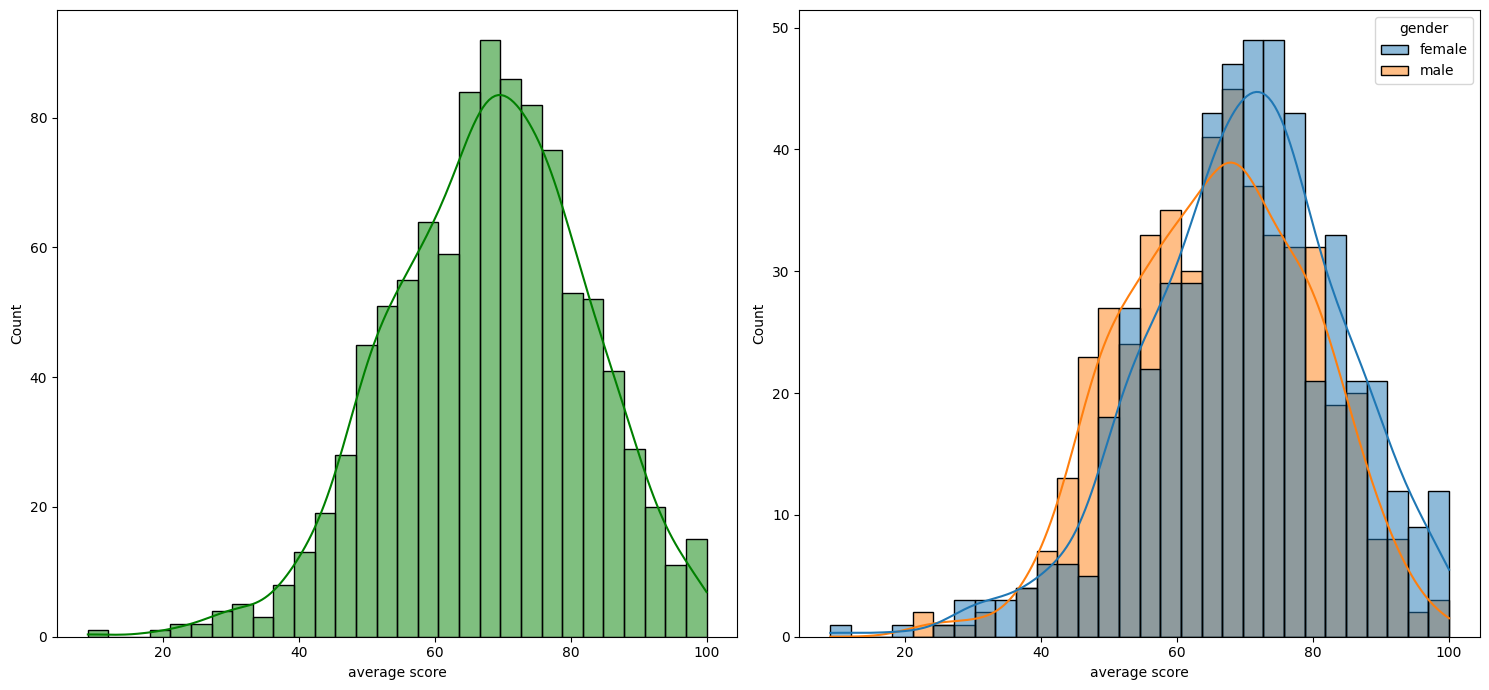

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))

sns.histplot(data = data, x = 'average score', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=data, x='average score', bins=30, kde=True, hue='gender', ax=axs[1])

plt.tight_layout()

plt.show()

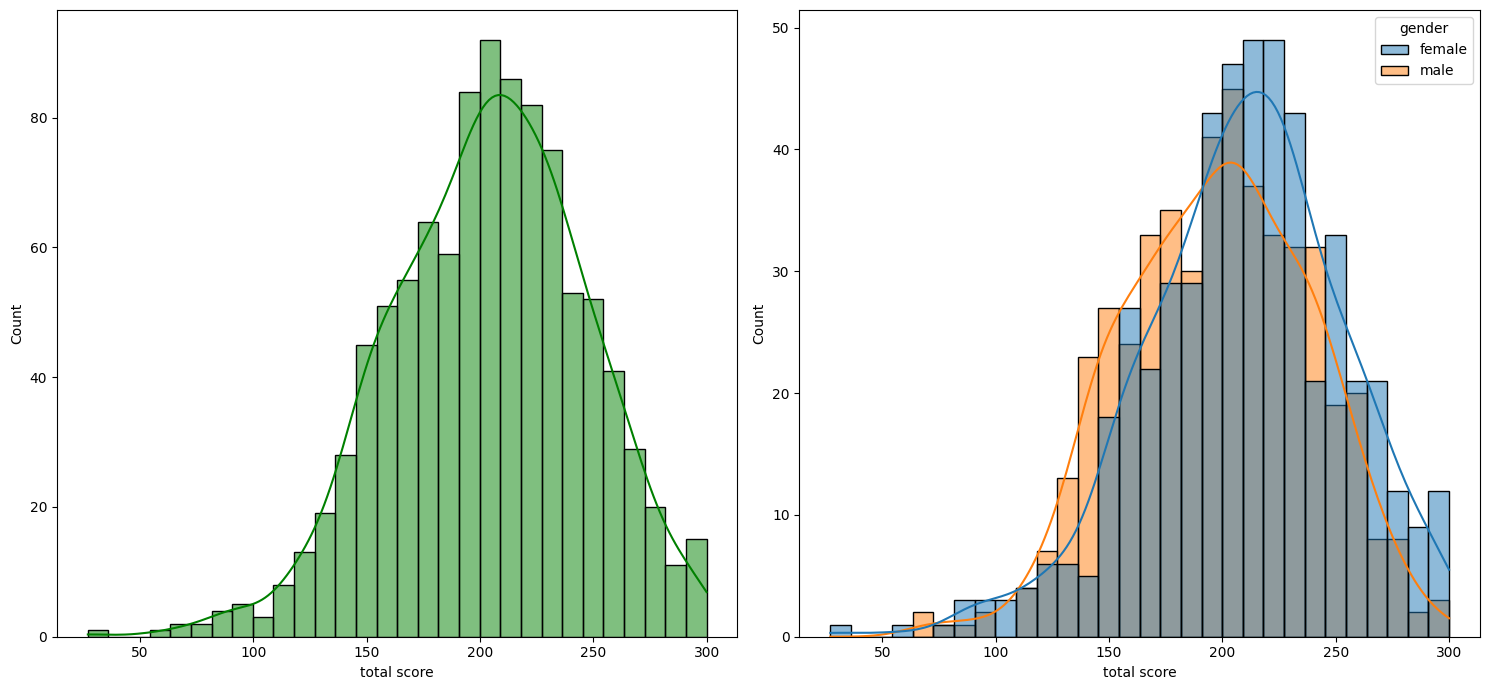

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))

sns.histplot(data = data, x = 'total score', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=data, x='total score', bins=30, kde=True, hue='gender', ax=axs[1])

plt.tight_layout()

plt.show()

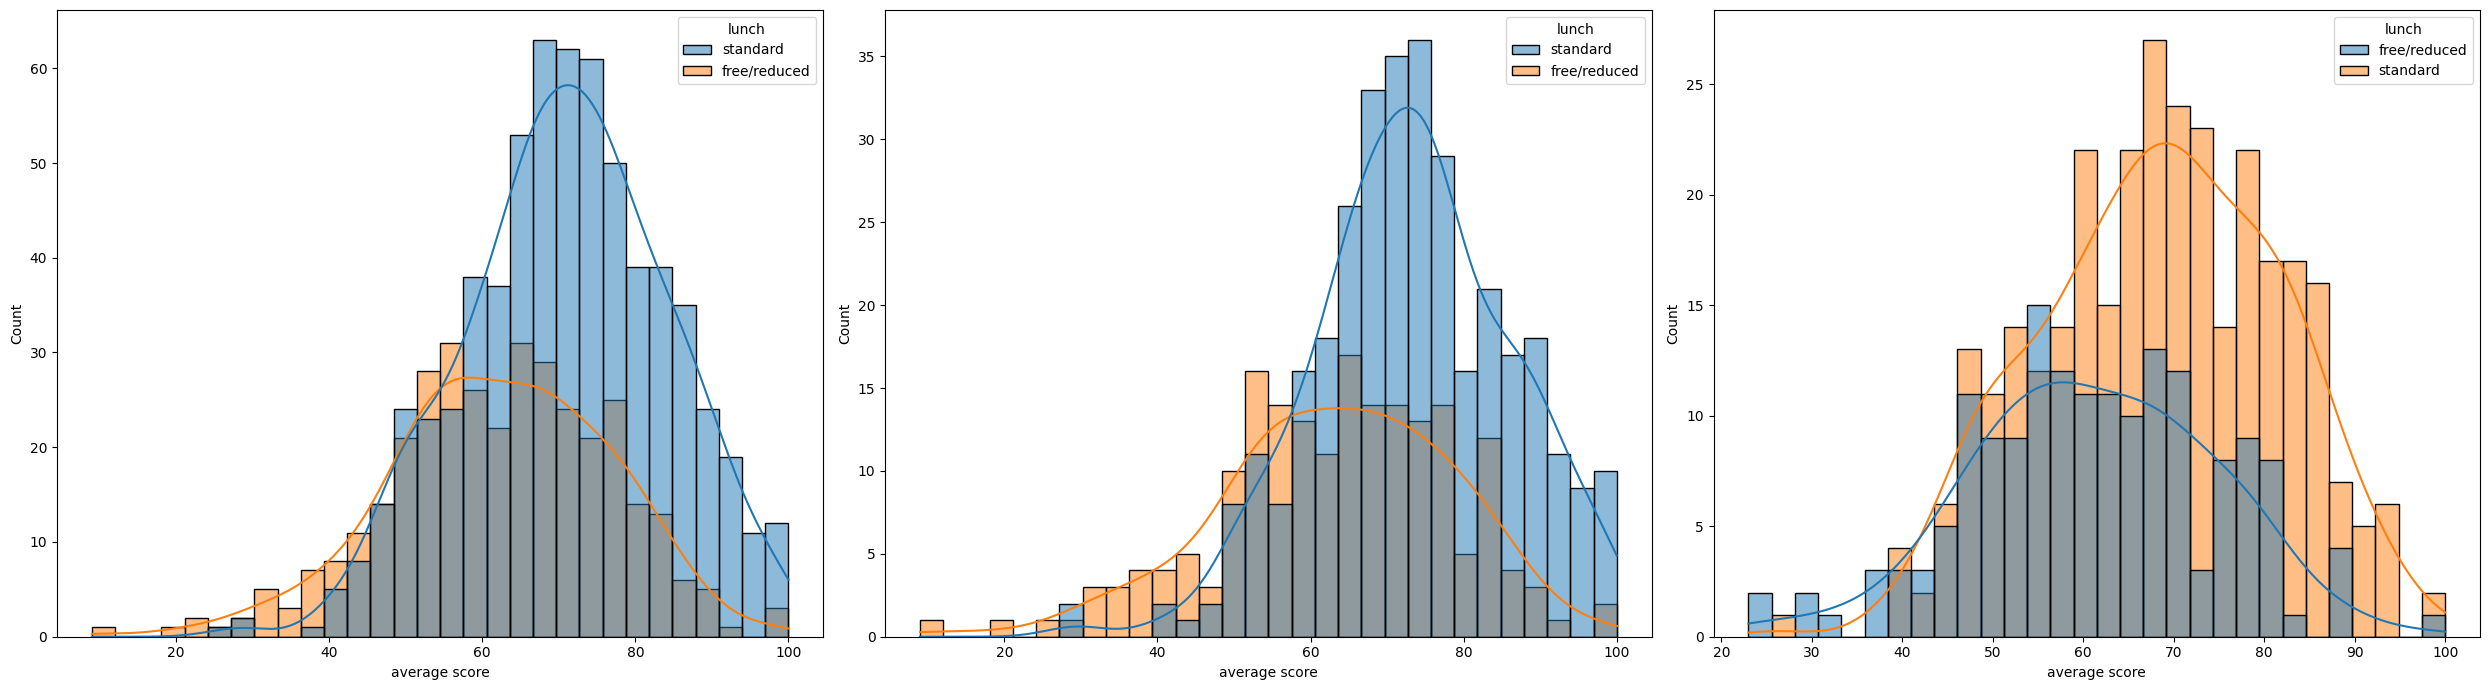

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='lunch', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='lunch', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='lunch', ax=axs[2])

plt.tight_layout()
plt.show()

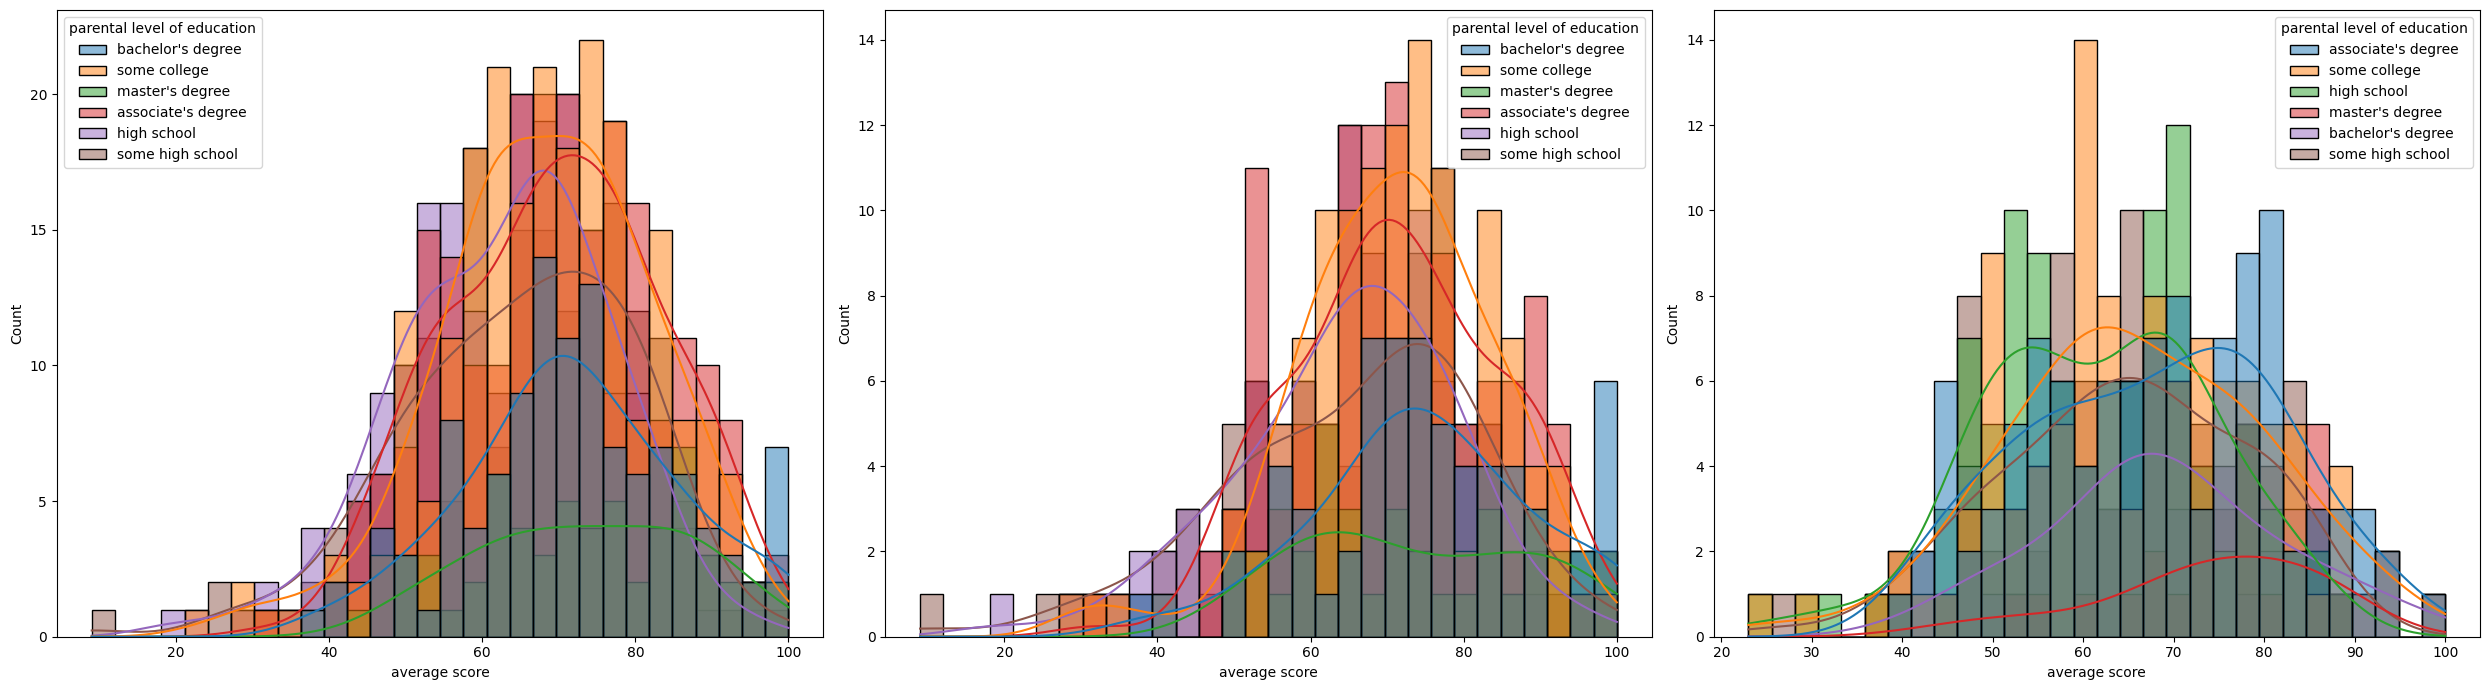

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[2])

plt.tight_layout()
plt.show()

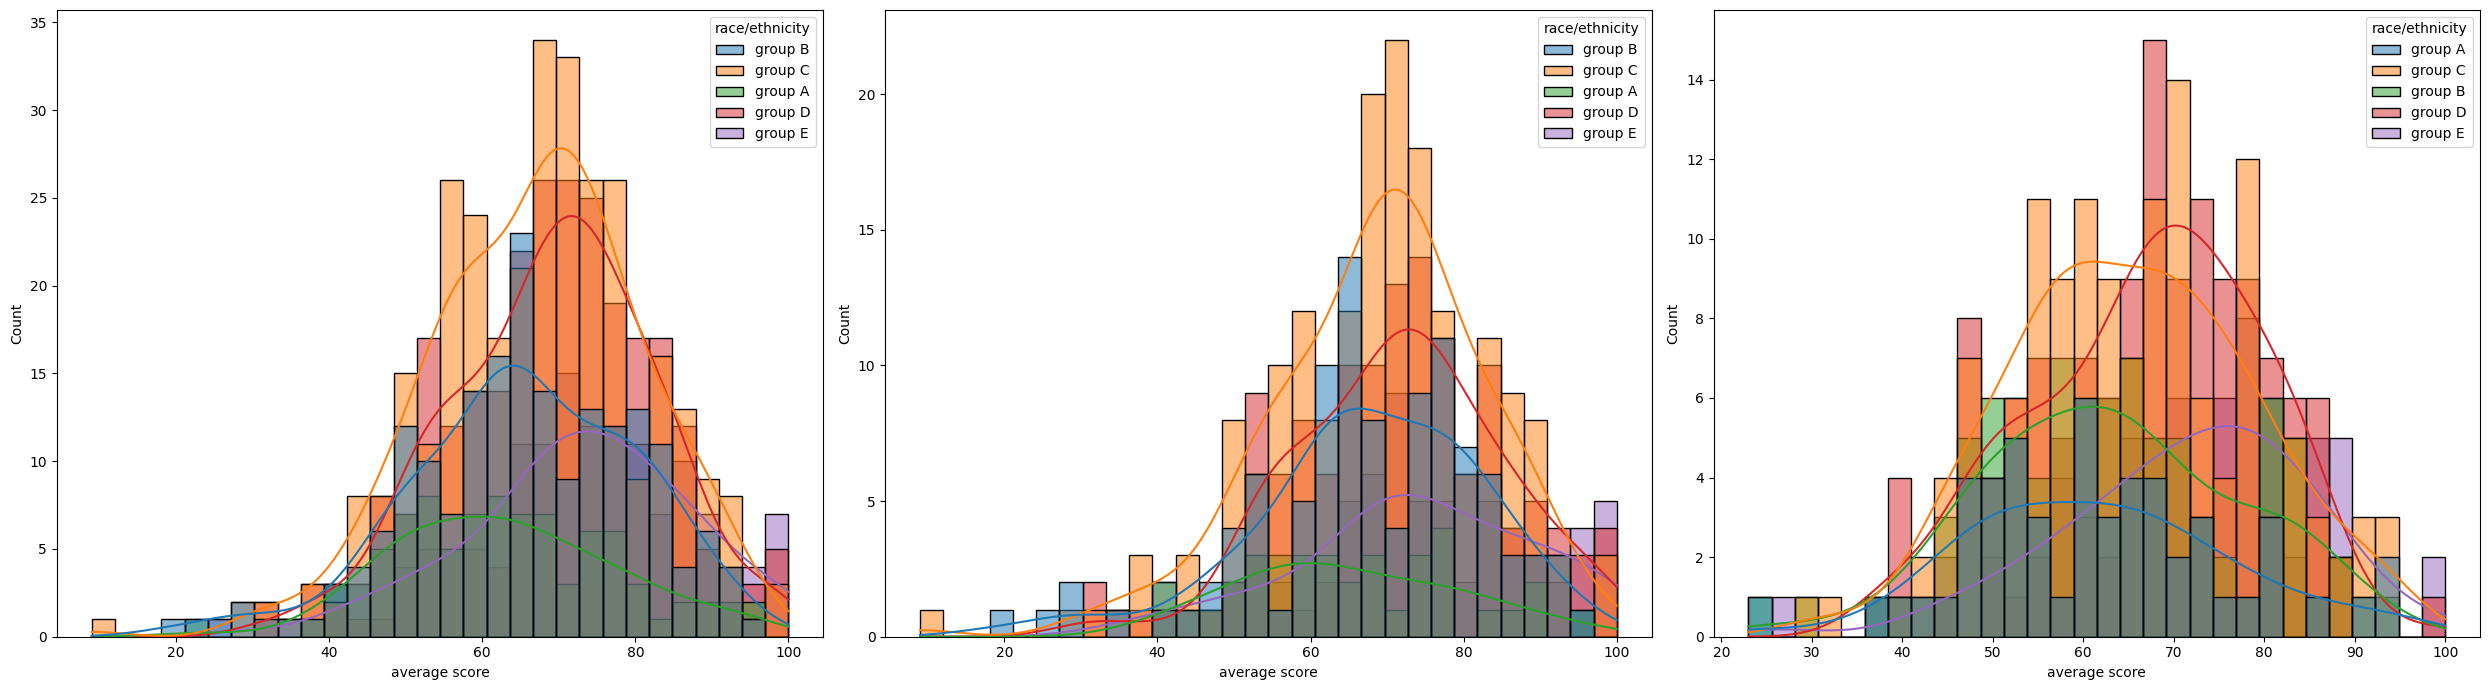

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[2])

plt.tight_layout()
plt.show()